# Backtracking


imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import backtrader as bt
import datetime


In [2]:
df = pd.read_csv("../raw_data/20230609-150316-processed-data.csv")
df.dropna(inplace=True)
df.head(1)

,timestamp,open,high,low,close,volume,volume_CMF,volume_FII,volume_MFI,volume_VWA,...,vortex_pos,S&P_close_filled,Interest_Rates_filled,Inflation_Rate_us,subhag_signal,Fisher,Fisher_trigger,supertrend,chop_index,Velocity
71,2019-09-11 19:00:00,9992.18,10110.21,9934.11,10044.87,643.32,-0.041563,154.369057,34.613137,10037.46237,...,0.900406,3000.93,2.25,2.0,-1.0,-0.33674,0.0292,-1.0,58.337947,-1.0


<IPython.core.display.Javascript object>


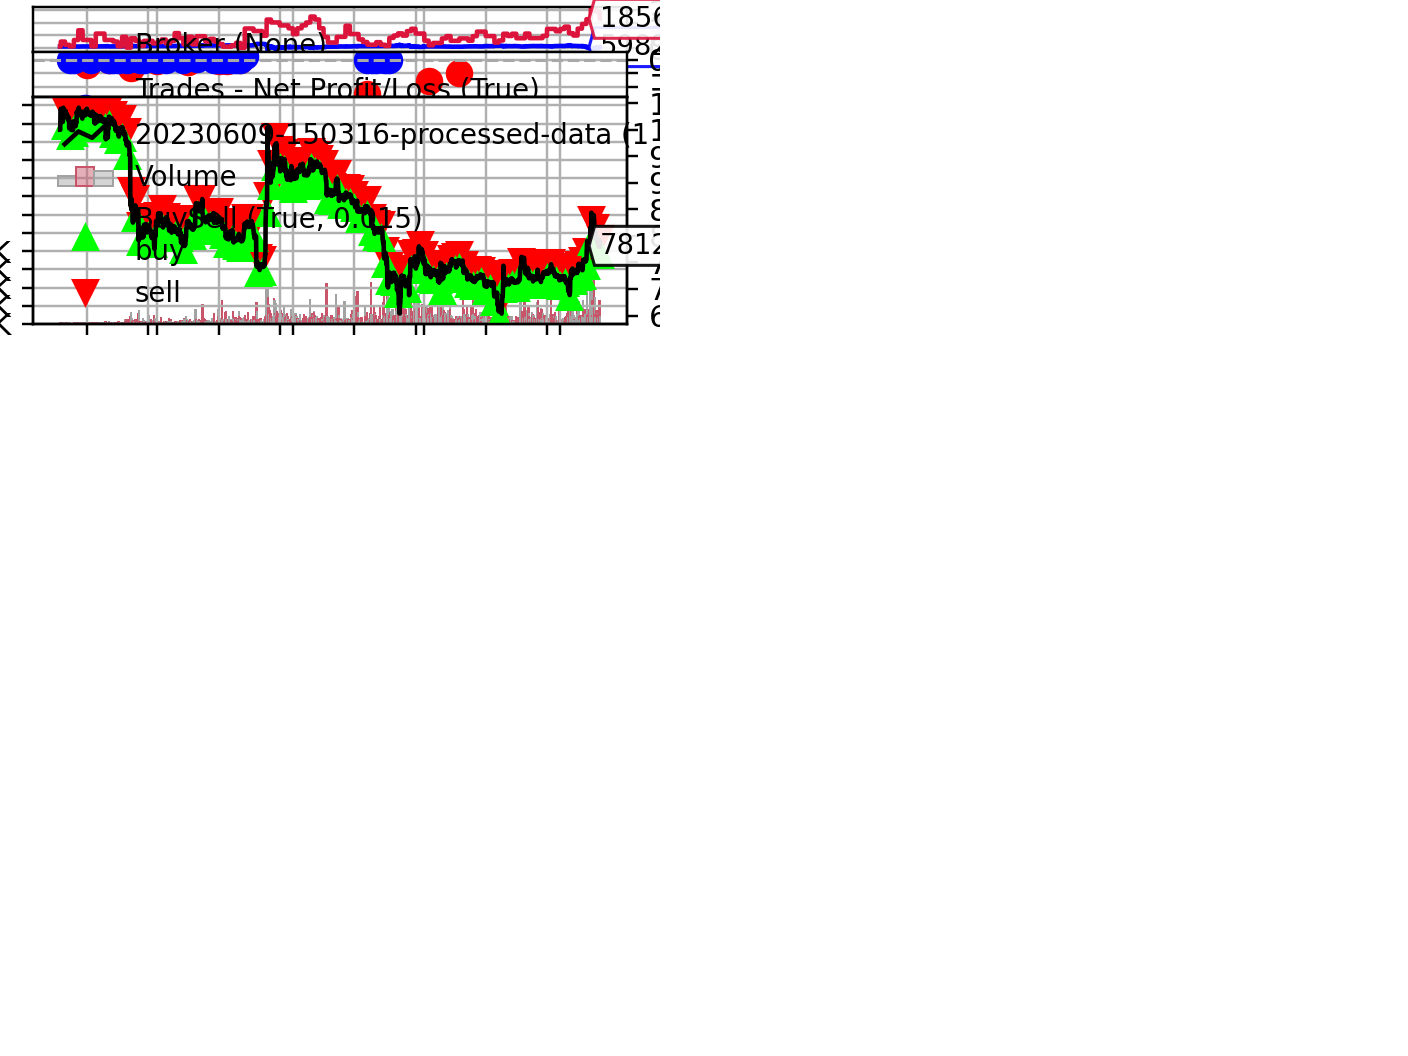

[[<Figure size 640x480 with 4 Axes>]]

In [3]:
class BitcoinStrategy(bt.Strategy):
    def __init__(self):
        self.data_close = self.datas[0].close
    
    def next(self):
        if self.data_close[0] < self.data_close[-1]:  # Predict price increase
            self.buy()
        elif self.data_close[0] > self.data_close[-1]:  # Predict price decrease
            self.sell()

cerebro = bt.Cerebro()

data = bt.feeds.GenericCSVData(
    dataname="../raw_data/20230609-150316-processed-data.csv",
    dtformat='%Y-%m-%d %H:%M:%S',
    datetime=0,
    high=2,
    low=3,
    open=1,
    close=4,
    volume=5,
    openinterest=-1
)

cerebro.adddata(data)
cerebro.addstrategy(BitcoinStrategy)

cerebro.run()

cerebro.plot()


In [4]:
import backtrader as bt
import pandas as pd
import pyfolio as pf

# Step 1: Define your Backtrader strategy class
class BitcoinPredictionStrategy(bt.Strategy):
    def __init__(self):
        # Initialize your prediction model here

    def next(self):
        # Generate buy or sell signals based on your prediction model
        if predicted_price_increase:
            self.buy()
        elif predicted_price_decrease:
            self.sell()

# Step 2: Load your CSV data
data = bt.feeds.GenericCSVData(
    dataname='../raw_data/20230609-150316-processed-data.csv',
    fromdate=datetime.datetime(2019, 9, 17),
    todate=datetime.datetime(2023, 6, 3),
    nullvalue=0.0,
    dtformat=('%Y-%m-%d %H:%M:%S'),
    datetime=0,
    high=1,
    low=2,
    open=3,
    close=4,
    volume=5,
    openinterest=-1
)

# Step 3: Create a Cerebro instance and add the strategy
cerebro = bt.Cerebro()
cerebro.addstrategy(BitcoinPredictionStrategy)
cerebro.adddata(data)

# Step 4: Run the backtest
cerebro.run()

# Step 5: Get the backtest results
strat = cerebro.run()[0]

# Step 6: Obtain the trade information
pf.create_round_trip_tear_sheet(strat)

# Step 7: Access the DataFrame with trade information and performance metrics
df = pf.round_trips.extract_round_trips(strat.analyzers.getbyname('roundtrips'))

# Step 8: Print the DataFrame
print(df)


IndentationError: expected an indented block after function definition on line 7 (3638066714.py, line 10)

IndentationError: expected an indented block after function definition on line 7 (3638066714.py, line 10)